Installing pytorch

In [225]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html


Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html


Installing fastai

In [226]:
!pip install fastai


Checking if GPU is enabled

In [339]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Mounting Google Drive 

In [227]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing Libraries

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline



In [0]:
from fastai import *
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Checking if files have been loaded right

In [269]:
!ls "/content/drive/My Drive/FastaiData/Indian_faces_dataset/train/woman"


images10.jpeg  images21.jpeg  images32.jpeg  images43.jpeg  images54.jpeg
images11.jpeg  images22.jpeg  images33.jpeg  images44.jpeg  images55.jpeg
images12.jpeg  images23.jpeg  images34.jpeg  images45.jpeg  images56.jpeg
images13.jpeg  images24.jpeg  images35.jpeg  images46.jpeg  images57.jpeg
images14.jpeg  images25.jpeg  images36.jpeg  images47.jpeg  images58.jpeg
images15.jpeg  images26.jpeg  images37.jpeg  images48.jpeg  images59.jpeg
images16.jpeg  images27.jpeg  images38.jpeg  images49.jpeg  images5.jpeg
images17.jpeg  images28.jpeg  images39.jpeg  images4.jpeg   images60.jpeg
images18.jpeg  images29.jpeg  images3.jpeg   images50.jpeg  images6.jpeg
images19.jpeg  images2.jpeg   images40.jpeg  images51.jpeg  images7.jpeg
images1.jpeg   images30.jpeg  images41.jpeg  images52.jpeg  images8.jpeg
images20.jpeg  images31.jpeg  images42.jpeg  images53.jpeg  images9.jpeg


In [0]:
path = '/content/drive/My Drive/FastaiData/Indian_faces_dataset'
path;


In [0]:
np.random.seed(2)


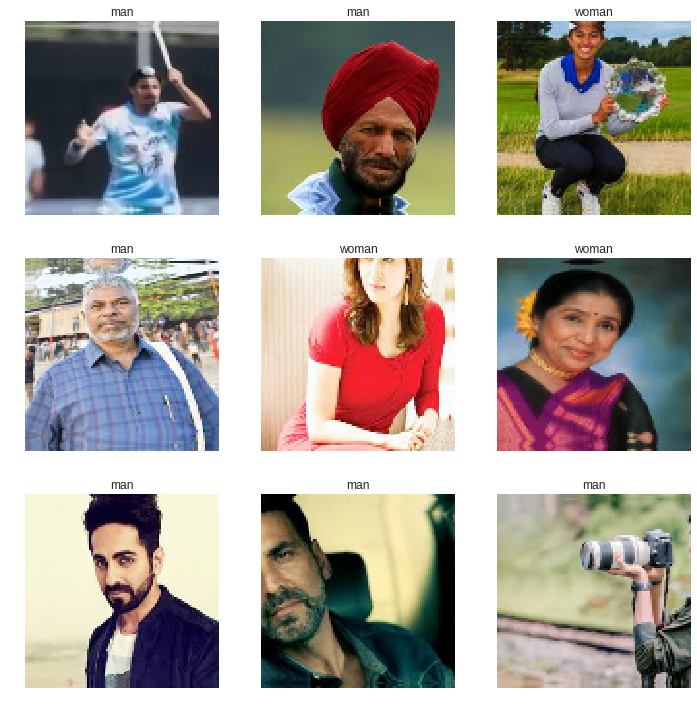

In [272]:
tfms = get_transforms(do_flip=False)
#default bs=64, set image size=100 to run successfully on colab
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=100)
data.show_batch(rows=3, figsize=(10,10))

In [273]:
print(data.classes)
len(data.classes),data.c

['man', 'woman']


(2, 2)

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [282]:
learn.fit_one_cycle(6)

Total time: 00:09
epoch  train_loss  valid_loss  error_rate
1      0.976905    1.010379    0.550000    (00:01)
2      0.742076    0.861343    0.450000    (00:01)
3      0.612918    0.711301    0.400000    (00:01)
4      0.529260    0.636116    0.350000    (00:01)
5      0.446259    0.614106    0.350000    (00:01)
6      0.398564    0.598918    0.250000    (00:01)



In [0]:
learn.save('stage-a')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

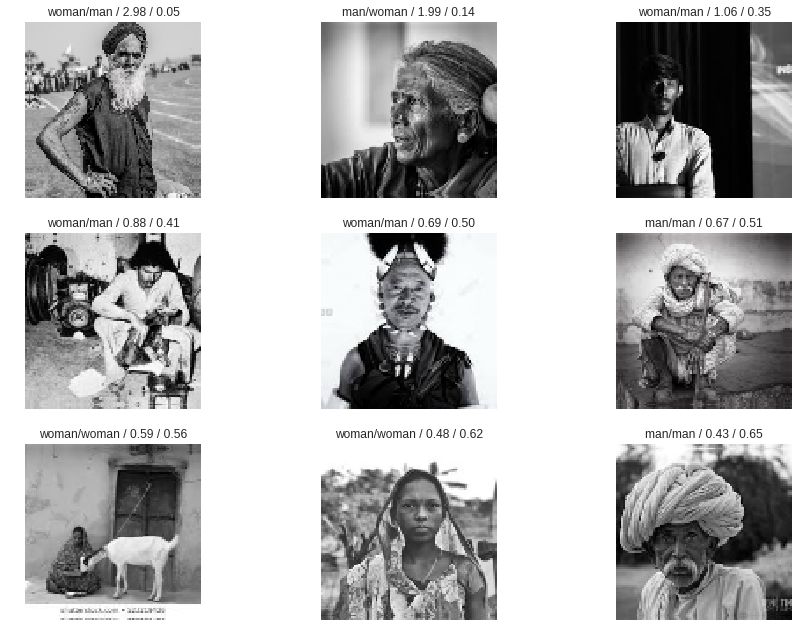

In [285]:
interp.plot_top_losses(9, figsize=(15,11))

In [286]:
interp.most_confused(min_val=2)

[('man', 'woman', 4)]

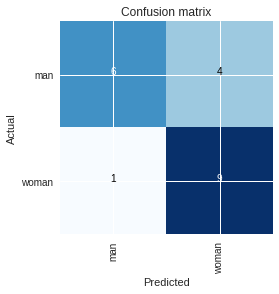

In [287]:
interp.plot_confusion_matrix()

In [0]:
learn.unfreeze()

In [289]:
learn.fit_one_cycle(5)

Total time: 00:08
epoch  train_loss  valid_loss  error_rate
1      0.263781    1.136744    0.400000    (00:01)
2      0.184603    1.689964    0.350000    (00:01)
3      0.140850    4.449215    0.350000    (00:01)
4      0.122480    5.085160    0.400000    (00:01)
5      0.110812    3.682216    0.300000    (00:01)



Note : Unfreezing the layers isn't improving the error_rate. So stage-a ( model saved without unfreeze is loaded back )

In [0]:
learn.load('stage-a')

In [290]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


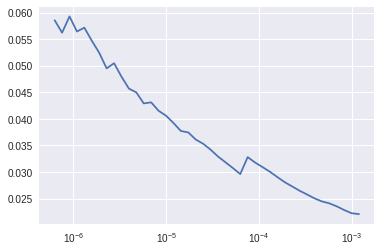

In [247]:
learn.recorder.plot()

The curve shows that the loss reduces from 1e-6 to 1e -3. So we are going to train it with learning rates 1e-6 to 1 e-3

In [291]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-3))

Total time: 00:05
epoch  train_loss  valid_loss  error_rate
1      0.009076    2.324049    0.300000    (00:01)
2      0.032253    1.738601    0.250000    (00:01)
3      0.026521    1.630889    0.250000    (00:01)



Let us check how it is predicting for a custom image. Loading the image testing_image1.jpg 


In [0]:
filename = '/content/drive/My Drive/FastaiData/Indian_faces_dataset/testing_image1.jpg'

Prediction by the model

In [313]:
img = open_image(filename)
losses = img.predict(learn)
learn.data.classes[losses.argmax()]


'woman'

Plotting the image to see if the prediction is correct. 

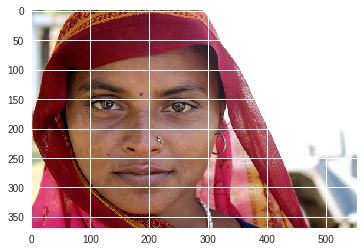

In [314]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()


Predictions for more images  : Quite surprised at the predictions. 

In [0]:
filename = '/content/drive/My Drive/FastaiData/Indian_faces_dataset/testing_image2.jpg'


In [298]:
img = open_image(filename)
losses = img.predict(learn)
learn.data.classes[losses.argmax()]


'woman'

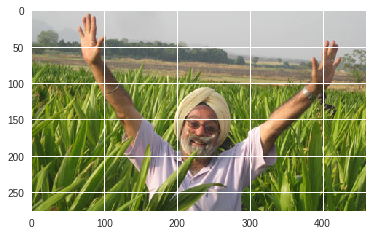

In [299]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [0]:
filename = '/content/drive/My Drive/FastaiData/Indian_faces_dataset/testing_image5.jpg'

In [301]:
img = open_image(filename)
losses = img.predict(learn)
learn.data.classes[losses.argmax()]

'man'

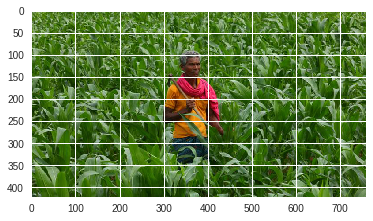

In [302]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [0]:
filename = '/content/drive/My Drive/FastaiData/Indian_faces_dataset/testing_image7.jpg'

In [304]:
img = open_image(filename)
losses = img.predict(learn)
learn.data.classes[losses.argmax()]

'woman'

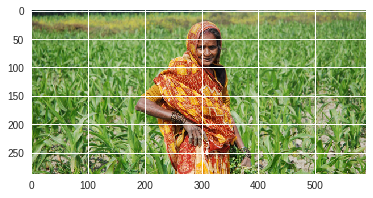

In [305]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [0]:
filename = '/content/drive/My Drive/FastaiData/Indian_faces_dataset/testing_image8.jpeg'

In [307]:
img = open_image(filename)
losses = img.predict(learn)
learn.data.classes[losses.argmax()]

'woman'

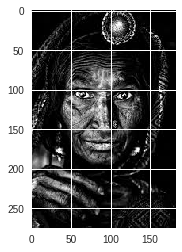

In [308]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [0]:
filename = '/content/drive/My Drive/FastaiData/Indian_faces_dataset/testing_image9.jpeg'

In [310]:
img = open_image(filename)
losses = img.predict(learn)
learn.data.classes[losses.argmax()]

'man'

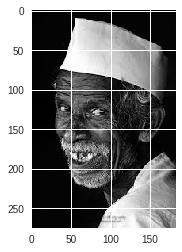

In [311]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()